# Employee Turnover Analysis
 


In [218]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [365]:
df = pd.read_csv('Human_Resources.csv')
>>> print(df)


       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             0.56               2   
15      

This dataframe shows us a list of employees from a specific company and variables describing their time there.
We want to look at the rate of turnover of the employees and answer a few questions to help the company moving foward.
### First we want to identify which factor is most predictive of an employee leaving?

### Next,can the company allocate more money to their employees to help entice them to stay? 

### Lastly, what can the company do preemptively while hiring an employee to help prevent said employee from leaving? 
By looking at the data we can come to some conclusions that should help the company dealing with their turnover problem.

## 1. Which factor is most predictative of an employee leaving?

In [20]:
list(df)
#Listing the list of variables which are represented in the dataset. 

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

By listing all the variables in the dataset we can see which factors we will be looking at.

In [24]:
df['left'].mean()

0.2380825388359224

The column 'left' has an integer value to represent whether or not the employee left the company with 1 indicating they did
and 0 indicating they did not. Taking the mean of this data we can see 23% of employees did indeed leave the company.


In [131]:
left_summary= df.groupby('left')
left_summary.mean()

#Here we are summarzing the data based on the average of each variable when an employee left and when an employee stayed.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [369]:
df.columns= ['Satisfaction Level', 'Last Evaluation','Number of Projects','Monthly Hours', 'Years at Company', 'Work Accident', 'Left', 'Promotion', 'Sales', 'Salary']
corrframe = pd.DataFrame(df.corr())
corrframe

,Satisfaction Level,Last Evaluation,Number of Projects,Monthly Hours,Years at Company,Work Accident,Left,Promotion
Satisfaction Level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
Last Evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
Number of Projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
Monthly Hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
Years at Company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work Accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
Left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
Promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


We have created a new dataframe showing a matrix of the correlation between all of the variables. The column we want to focus on
at the moment is the "left" row. Here we can see which values are most closely correlated, positive or negative, to an employee leaving.

The Heat Map will give us a visual representation of which values are closest correlated.
dual histogram for relationship between variables

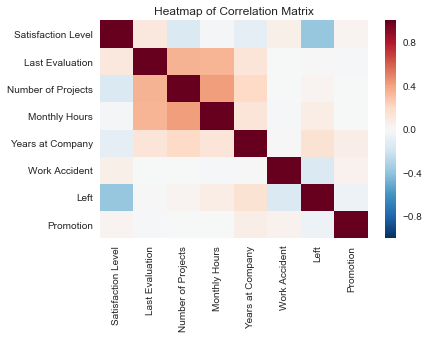

In [370]:
import seaborn as sns
sns.heatmap(corrframe)
sns.plt.title('Heatmap of Correlation Matrix')

In [371]:
print (corrframe['Left'])

Satisfaction Level   -0.388375
Last Evaluation       0.006567
Number of Projects    0.023787
Monthly Hours         0.071287
Years at Company      0.144822
Work Accident        -0.154622
Left                  1.000000
Promotion            -0.061788
Name: Left, dtype: float64


We want to look at the absolute value of each these values so we can see which variable has the most impact on an employee leaving regardless of whether that value is positive or negative. So we are looking for the values closest to 1 or -1.
"Satisfaction Level" has the largest correlation positive or negative to employees leaving the firm. To take a closer look at the "Satisfaction Level" variable we want to first find out whether the variable is normally distributed.

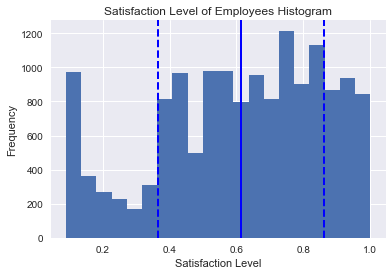

In [373]:
satis = df['Satisfaction Level']
plt.hist(satis, bins=20)
plt.axvline(satis.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(satis.mean() + satis.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(satis.mean()-satis.std(), color='b', linestyle='dashed', linewidth=2)
plt.title('Satisfaction Level of Employees Histogram')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

In [375]:
satis_1 = sorted(satis)
norm = np.random.normal(0, 1, 14999)
norm_1 = sorted(norm)

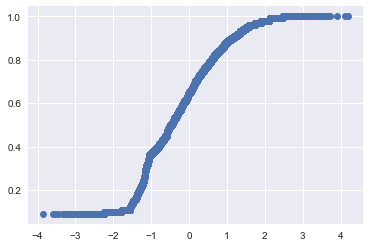

In [376]:
plt.plot(norm_1, satis_1, "o") 
plt.show() 

In [377]:
import scipy.stats as stats
stats.normaltes

NormaltestResult(statistic=1200.9584504966565, pvalue=1.6412924703269606e-261)

Taking a look at the two graphs and the p value of our Normal test we can see that the data is not normally distributed. Luckily we can use the Mann-Whitney U test to determine if our sample means came from a similar distribution. This would mean the satisfaction level does not vary between workers who left and those who stayed.

From our earlier chart we can see the mean satisfaction level of employees who left was 0.440098.
The mean satisfaction level of employees who stayed was 0.666810.

In [390]:

satis_left = df[df['Left']==1]['Satisfaction Level']
satis_stay = df[df['Left']==0]['Satisfaction Level']

scipy.stats.mannwhitneyu(satis_left,satis_stay)

MannwhitneyuResult(statistic=10286473.0, pvalue=0.0)

Looking at our extremely low p value we can conclude these two means do not come from the same distribution, meaning that satisfaction level does indeed vary between employees who left and those who stayed. Combining this test with our correlation matrix, and heat map we can conclude satisfaction level is the best predictor of whether an employee will stay or not. We will discuss how the company can use this information to prevent employees from staying later in the report.

## Can the company allocate more money to salary to entice employees to stay?

In [378]:

salary = df['Salary']
x = set(salary)
print (x)

{'high', 'medium', 'low'}


In [379]:
from collections import Counter
Counter(salary)
#There are 1237 instances of a high salary, 7316 instances of a low salary, and 6446 instances of a medium salary.


Counter({'high': 1237, 'low': 7316, 'medium': 6446})

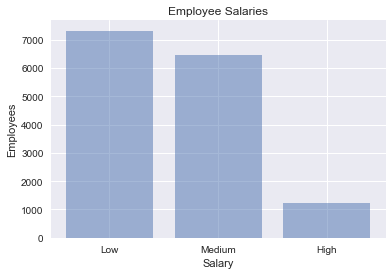

In [236]:
new_sal = [7316, 6446, 1237]
objects = ('Low', 'Medium','High')
y_pos = np.arange(len(objects))
plt.bar(y_pos, new_sal, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Employees')
plt.xlabel('Salary')
plt.title('Employee Salaries')

We Have a bar chart showing the number from the table above. To get meaningful information from this chart we need to add the
amount of employees who left the company from each salary point.

In [299]:
sal_low = df[(df['left']==1) & (df['salary']=='low')]
sal_low.count()

satisfaction_level       2172
last_evaluation          2172
number_project           2172
average_montly_hours     2172
time_spend_company       2172
Work_accident            2172
left                     2172
promotion_last_5years    2172
sales                    2172
salary                   2172
dtype: int64

In [298]:
sal_med = df[(df['left']==1) & (df['salary']=='medium')]
sal_med.count()

satisfaction_level       1317
last_evaluation          1317
number_project           1317
average_montly_hours     1317
time_spend_company       1317
Work_accident            1317
left                     1317
promotion_last_5years    1317
sales                    1317
salary                   1317
dtype: int64

In [293]:
sal_high =df[(df['left']==1) & (df['salary']=='high')]
sal_high.count()

satisfaction_level       82
last_evaluation          82
number_project           82
average_montly_hours     82
time_spend_company       82
Work_accident            82
left                     82
promotion_last_5years    82
sales                    82
salary                   82
dtype: int64

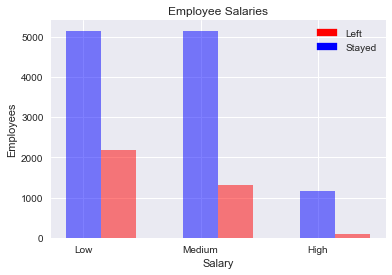

In [388]:
#Now we can see how many employees left the company from each salary point.
import matplotlib.patches as mpatches
sal_left =[2172,1317,82]
sal_stayed =[(7316-2172),(6446-1317),(1237-82)]
objects = ('Low', 'Medium','High')
y_pos =np.arange(len(objects))
plt.bar(y_pos, sal_stayed, align='center', alpha=0.5, width=.3, color='b', label= 'Stayed With Company')
plt.bar(y_pos+.3, sal_left, align='center', alpha=0.5, width=.3, color ='r', label='Left Company')
plt.xticks(y_pos, objects)
plt.ylabel('Employees')
plt.xlabel('Salary')
plt.title('Employee Salaries')
red = mpatches.Patch(color='r', label='Left')
blue = mpatches.Patch(color='b', label='Stayed')
plt.legend(handles=[red, blue])

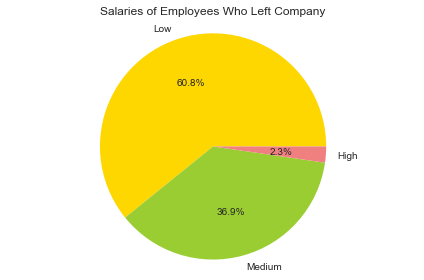

In [337]:
labels = 'Low', 'Medium', 'High'
sizes =[2172,1317,82]
colors = ['gold', 'yellowgreen', 'lightcoral', ]
explode = (0, 0, 0.0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=360)
 
plt.axis('equal')
plt.title('Salaries of Employees Who Left Company')
plt.tight_layout()
plt.show()

From the charts in this section we can tell a number of things about the salary of the employees of the company. The pie chart shows us that an extremely small percentage of employees who earned a high salary ended up leaving the company (2.3%). From the bar chart we know this number is only 82 of the 15000 employees who were surveyed.

We can also see that the number of employees who receive both low and medium salaries are relatively similar, however those with low salaries tend to leave the company more often (as the pie chart clearly dictates.) 

Based on this information we can reasonably state that if the company allocated more money to salaries they would see a decrease in employee turnover. Employees are less likely to leave receiving a medium salary rather than a low one, and only in very rare circumstances leave while receiving a high salary.

## What can the company do preemptively while hiring an employee to help prevent said employee from leaving? 

To being to answer this question is important that we begin to analyze the other variables in the data set to see which other factors lead to employees leaving.

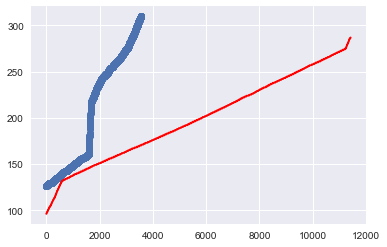

In [409]:
x= df[df['Left']==1]['Monthly Hours']
y= df[df['Left']==0]['Monthly Hours']

hours_left=sorted(x)
hours_stay=sorted(y)

plt.plot(hours_left,"o") 
plt.plot(hours_stay,"r") 
plt.show() 